# Unidade V - Aprendizagem Profunda (*Deep Learning*)
# Aula 03: Construção e treinamento de redes neurais profundas
# Roteiro
 * Introdução aos pacotes *Keras* e *TensorFlow*
 * Estudo de caso: construção de um classificador de imagens
 * Criação de rede neural profunda baseada em API Sequencial
 * Uso da rede neural para fazer predições

## Introdução aos pacotes *Keras* e *TensorFlow*

*Keras* é uma biblioteca de aprendizagem profunda que permite construir, treinar, avaliar e executar facilmente todos os tipos de redes neurais. Ela ganhou popularidade rapidamente devido à sua facilidade de uso, flexibilidade e design. Para realizar os cálculos pesados exigidos pelas redes neurais, a biblioteca depende de um *back-end* de computação. Atualmente, é possível escolher entre três bibliotecas de Deep Learning de código aberto: *TensorFlow*, *Microsoft Cognitive Toolkit* (CNTK) e *Theano*. Portanto, para evitar qualquer confusão, nos referiremos a essa implementação de referência como *Keras multi back-end*. 

Desde o final de 2016, outras implementações foram lançadas. Agora você pode executar *Keras* no *Apache MXNet* ou *Core ML* da Apple. Além disso, nos últimos releases, o próprio *TensorFlow* possui sua própria implementação *Keras*: *tf.keras*. Ele só oferece suporte ao *TensorFlow* como *back-end*, mas tem a vantagem de oferecer alguns recursos extras muito úteis, como pode ser visualizado na Figura a seguir.

![Alt Text](images/keras.png "Title")

A biblioteca de deep learning mais popular, depois de *Keras* e *TensorFlow*, é a *PyTorch* do Facebook. Ela é bastante semelhante ao *Keras*, então, uma vez que você conhece *Keras*, não é difícil adaptar-se à *PyTorch*, caso seja necessário. A popularidade do PyTorch cresceu exponencialmente em 2018, em grande parte graças à sua simplicidade e excelente documentação, que não eram os principais pontos fortes do *TensorFlow* 1.x. No entanto, o *TensorFlow* 2 é indiscutivelmente tão simples quanto *PyTorch*. A documentação também foi completamente reorganizada e está muito mais fácil encontrar o que você precisa. Esse ambiente saudável de “competição” entre as bibliotecas de deep learning é benéfica para todos!

**Instalação do Tensorflow**

In [ ]:
#!pip install tensorflow

In [1]:
import sys
import sklearn

try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Configuração das pastas
PROJECT_ROOT_DIR = "deeplearning"
#CHAPTER_ID = "ann"
#IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
IMAGES_PATH = "images"
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings('ignore')

## Estudo de caso: construção de um classificador de imagens

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.9.1'

In [4]:
keras.__version__

'2.9.0'

Vamos começar carregando o conjunto de dados MNIST, que 70.000 imagens em tons de cinza de 28 × 28 *pixels* cada, divididas em 10 classes. Keras tem uma série de funções para carregar conjuntos de dados populares em `keras.datasets`. O conjunto de dados já está dividido entre um conjunto de treinamento e um conjunto de teste, mas pode ser útil dividir ainda mais o conjunto de treinamento para ter um conjunto de validação:

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

O conjunto de treinamento possui 60.000 imagens.

In [6]:
X_test.shape

(10000, 28, 28)

A intensidade de cada *pixel* é representeda como um byte (0 a 255).

In [7]:
X_train_full.dtype

dtype('uint8')

Vamos dividir o conjunto de treinamento em um conjunto de validação e um conjunto de treinamento (menor). Também dimensionamos as intensidades de pixel para o intervalo de 0 a 1 e convertemos os valores para ponto-flutuante, dividindo por 255.

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [9]:
print(X_train_full.shape)
print(X_test.shape)
print(X_valid.shape)

(60000, 28, 28)
(10000, 28, 28)
(5000, 28, 28)


Você pode plotar uma imagem usando a função `imshow()` do pacote `Matplotlib`, por meio de um mapa de cores com a opção `binary`.

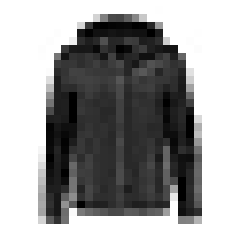

In [10]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

Os rótulos são representados pelos IDs das classes, de 0 a 9.

In [11]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Os nomes correspondentes são os seguintes:

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Portanto, a primeira imagem do conjunto de treinamento é um casaco.

In [13]:
class_names[y_train[0]]

'Coat'

O conjunto de validação contém 5.000 imagens e o conjunto de teste contém 10.000 imagens:

In [14]:
X_valid.shape

(5000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

Vamos observar uma amostra das imagens no conjunto de dados.

Saving figure fashion_mnist_plot


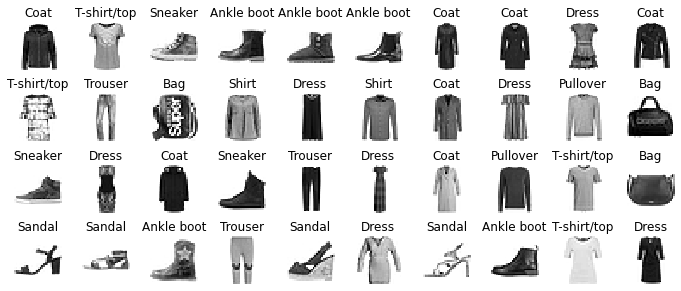

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

## Criação de rede neural profunda baseada em API Sequencial

Agora vamos construir a rede neural profunda! Criaremos um classificador MLP com duas camadas profundas.

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Vamos examinar este código-fonte linha a linha:
 * a primeira linha cria um modelo sequencial; este é o tipo mais simples de modelo Keras para redes neurais profundas, compostas apenas por uma pilha de camadas conectadas sequencialmente. Isso é chamado de **API Sequencial**;
 * em seguida, construímos a primeira camada e a adicionamos ao modelo; é uma camada `Flatten` cuja função é converter cada imagem de entrada em um array 1D; esta camada não possui parâmetros, ela faz apenas um pré-processamento simples; por ser a primeira camada do modelo, você deve especificar `input_shape`, que representa o formato das instâncias (28 x 28 pixels);
 * em seguida, adicionamos a primeira camada oculta com 300 neurônios, usando a função de ativação `relu`;
 * logo após, adicionamos uma segunda camada oculta com 100 neurônios, também usando a função de ativação `relu`;
 * por fim, adicionamos uma camada de saída com 10 neurônios (um por classe), usando a função de ativação `softmax`, porque as classes são exclusivas.

Outra possibilidade de criação da rede neural profunda:

```python
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
```

As camadas da rede neural profunda.

In [18]:
model.layers

O método `summary()` exibe as informações de todas as camadas do modelo, seus nomes, que são gerados automaticamente (a menos que você especifique ao criar a camada), a forma de saída e o número de parâmetros, que podem ser treináveis ou não treináveis. Neste capítulo estudaremos apenas parâmetros treináveis.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Observe que as camadas densas geralmente têm **muitos parâmetros**. 

Por exemplo, a primeira camada oculta tem 784 pesos de conexão (número de entradas) × 300 (neurônios da camada), mais 300 pesos de viés (*bias*), que somam 235.500 parâmetros! Isso dá ao modelo bastante flexibilidade para ajustar os dados de treinamento, mas também significa que o modelo corre o risco de *overfitting*, especialmente quando você não tem muitos dados de treinamento.

É possível acessar todas as camadas e os seus parâmetros, por meio de métodos como `get_weights()` e `set_weights()`.

In [20]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [21]:
model.get_layer(hidden1.name) is hidden1

True

In [22]:
weights, biases = hidden1.get_weights()

In [23]:
weights

array([[ 0.0411652 , -0.0714129 , -0.01124369, ..., -0.04271541,
         0.01394776,  0.04110657],
       [ 0.02980029, -0.07274865,  0.06535408, ...,  0.03359376,
        -0.0453014 ,  0.02917019],
       [ 0.00410532, -0.03055817,  0.01242496, ..., -0.03414365,
         0.04307543, -0.02983186],
       ...,
       [-0.02897805,  0.06765178,  0.00761587, ..., -0.00345723,
        -0.0574559 ,  0.06813014],
       [ 0.05247939, -0.06683244, -0.06911381, ...,  0.01733018,
         0.05407661, -0.05709047],
       [-0.04025251, -0.04655488, -0.00850269, ...,  0.06643349,
        -0.01616603, -0.01035316]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

**Compilando o modelo**

Depois que um modelo é criado, você deve executar o método `compile()` para especificar a função de perda (ou custo, que é usada para minimizar o erro) e o otimizador a ser usado. Opcionalmente, você pode especificar uma lista de métricas extras para calcular durante o treinamento e avaliação.

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Esse código é equivalente a:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

**Treinamento**

A cada época, `Keras` mostra algumas informações, como a perda e a acurácia, para os conjuntos de teste e treinamento.

In [28]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7213 - accuracy: 0.7644 - val_loss: 0.5344 - val_accuracy: 0.8212
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4885 - accuracy: 0.8309 - val_loss: 0.4520 - val_accuracy: 0.8440
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4422 - accuracy: 0.8458 - val_loss: 0.4247 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4143 - accuracy: 0.8547 - val_loss: 0.3872 - val_accuracy: 0.8676
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3954 - accuracy: 0.8608 - val_loss: 0.3858 - val_accuracy: 0.8644
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3806 - accuracy: 0.8662 - val_loss: 0.3735 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3674 - accuracy: 0.8701 - val_loss: 0.3610 - val_accuracy:

Épocas do treinamento

In [29]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


Métricas coletadas em cada época.

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Se você usar este dicionário para criar um DataFrame da biblioteca `pandas` e passar como parâmetro ao método `plot()`, você irá visualizar as curvas de aprendizagem, mostradas na Figura a seguir.

Saving figure keras_learning_curves_plot


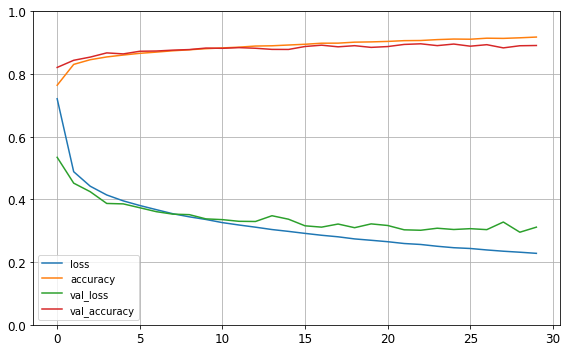

In [31]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

Você pode perceber que a acurácia do treinamento e a acurácia da validação aumentam continuamente durante o treinamento, enquanto a perda do treinamento e a perda da validação diminuem. Isso é bom! Além disso, as curvas de validação estão próximas das curvas de treinamento, o que significa que não há muito *overfitting*. Nesse caso específico, o modelo parece ter um desempenho melhor no conjunto de validação do que no conjunto de treinamento no início do processo. Mas esse não é o caso: na verdade, o erro de validação é calculado no final de cada época, enquanto o erro de treinamento é calculado usando uma média contínua durante cada época. Portanto, a curva de treinamento deve ser deslocada meio período para a esquerda. Se você fizer isso, verá que as curvas de treinamento e validação se sobrepõem quase perfeitamente no início do treinamento.

**Ajuste dos Hiperparâmetros**

Se você não estiver satisfeito com o desempenho do modelo, pode reinicar o processo para ajustar os hiperparâmetros. 
O primeiro a verificar é a **função de perda**. Se isso não ajudar, tente o **otimizador**. Se o desempenho ainda não for bom, tente ajustar os hiperparâmetros do modelo, como o **número de camadas**, o **número de neurônios por camada** e os tipos de **funções de ativação** das camadas ocultas. Quando estiver satisfeito com a precisão da validação do seu modelo, você deve avaliá-lo no conjunto de teste para conhecer o erro de generalização antes de implantar o modelo em produção. Você pode fazer isso facilmente usando o método `evaluate()`.

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3494 - accuracy: 0.8753


[0.34940844774246216, 0.8752999901771545]

## Uso da rede neural para fazer predições

Em seguida, podemos usar o método `predict()` para fazer predisões em novas instâncias. Como não temos novas instâncias reais, usaremos apenas as três primeiras instâncias do conjunto de teste.

In [33]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 75ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.06, 0.  , 0.93],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Como você pode ver, para cada instância o modelo estima uma probabilidade por classe, da classe 0 à classe 9. Por exemplo, para a primeira imagem ele estima que a probabilidade da classe 9 (bota) é de 96%. Se você está preocupado apenas em identificar a classe por meio da probabilidade, independentemente do seu valor, então você pode usar o método `predict_classes()`.

In [34]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [35]:
np.array(class_names)[y_pred]

NameError: name 'y_pred' is not defined

É possível ainda visualizar as figuras das classes.

In [ ]:
y_new = y_test[:3]
y_new

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()